In [2]:
import pandas as pd 
import numpy as np 
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
counter=0
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("cleancsv.csv")
lemmatizer = WordNetLemmatizer()

In [4]:
def clean_text (text):
    title =re.sub('[^a-zA-Z]' ,' ', str(text))
    title = title.lower()
    title = title.split()
    title = [lemmatizer.lemmatize(word) for word in title if not word in set (stopwords.words('english'))]
    title =[lemmatizer.lemmatize(word,pos='v') for word in title]
    title = ' '.join(title)
    global counter
    counter=counter+1
    print(counter)
    return title


In [2]:
#df['title'] = df['title'].apply(clean_text)

In [1]:
#df['text'] = df['text'].apply(clean_text)

In [5]:
df.to_csv('clean_csv.csv')

In [6]:
ahmed = pd.read_csv("cleancsv.csv")

In [7]:
ahmed.head()

,title,text,label
0,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,ever get feel life circle roundabout rather he...,0
2,truth might get fire,truth might get fire october tension intellige...,1
3,civilian kill single u airstrike identify,video civilian kill single u airstrike identif...,1
4,iranian woman jail fictional unpublished story...,print iranian woman sentence six year prison i...,1


In [115]:
#ahmed.drop('author',axis=1,inplace=True)

In [8]:
df.head()

,title,text,label
0,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,ever get feel life circle roundabout rather he...,0
2,truth might get fire,truth might get fire october tension intellige...,1
3,civilian kill single u airstrike identify,video civilian kill single u airstrike identif...,1
4,iranian woman jail fictional unpublished story...,print iranian woman sentence six year prison i...,1


In [10]:
ahmed1 = pd.read_csv("cleancsv.csv")

In [11]:
ahmed1.head()

,title,text,label
0,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,ever get feel life circle roundabout rather he...,0
2,truth might get fire,truth might get fire october tension intellige...,1
3,civilian kill single u airstrike identify,video civilian kill single u airstrike identif...,1
4,iranian woman jail fictional unpublished story...,print iranian woman sentence six year prison i...,1


In [12]:
ahmed1.isna().sum()

title    0
text     0
label    0
dtype: int64

In [13]:
ahmed1.describe()

,label
count,19962.000000
mean,0.479711
std,0.499601
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
#e show there the balance between the class label 
ahmed1.groupby("label").count()

,title,text
label,,
0,10386,10386
1,9576,9576


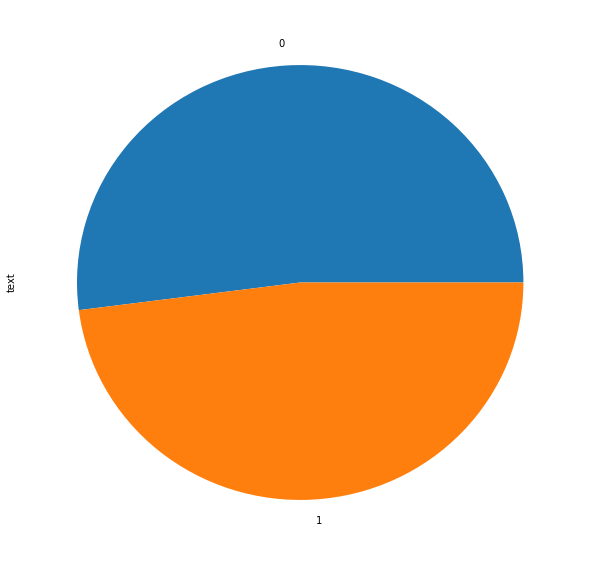

In [18]:
#plot data
import matplotlib.pyplot as plt 
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
ahmed1.groupby("label").count()['text'].plot(kind = "pie")

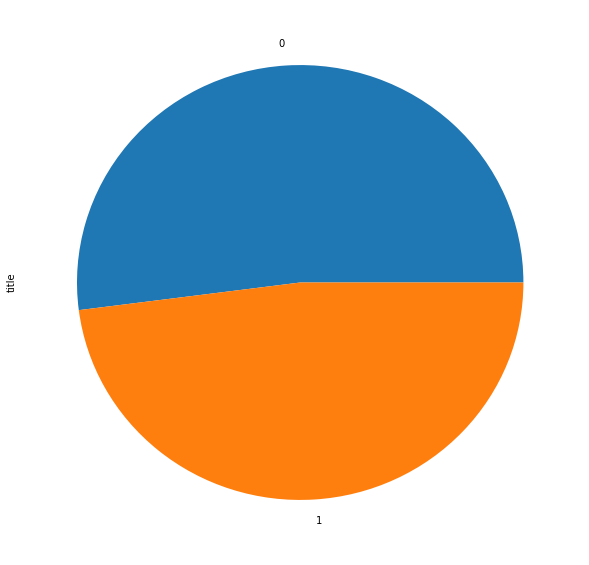

In [19]:
#plot data
fig, ax = plt.subplots(figsize=(10,10))
ahmed1.groupby("label").count()['title'].plot(kind = "pie")

In [20]:
all_words = [word for tokens in ahmed1["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in ahmed1["text"]]


In [29]:
#df2 = pd.DataFrame(columns=[all_words, sentence_lengths])

In [21]:
type(all_words)

list

In [22]:
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

59944329 words total, with a vocabulary size of 27
Max sentence length is 77292


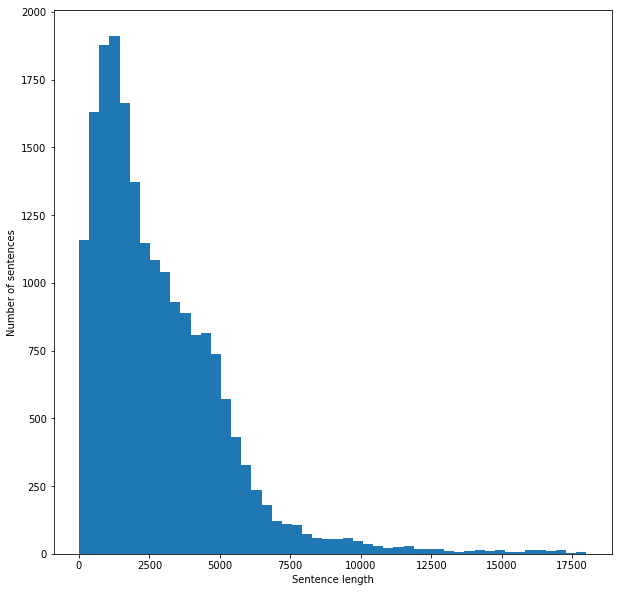

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
#plt.xticks(np.arange(min(x), max(x)+1,20000)
#plt.xticks(np.arange(1,20000,2000))
plt.hist(sentence_lengths , bins= 50 , range=(0, 18000))
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = ahmed1["text"].tolist()
list_labels = ahmed1["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2,random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

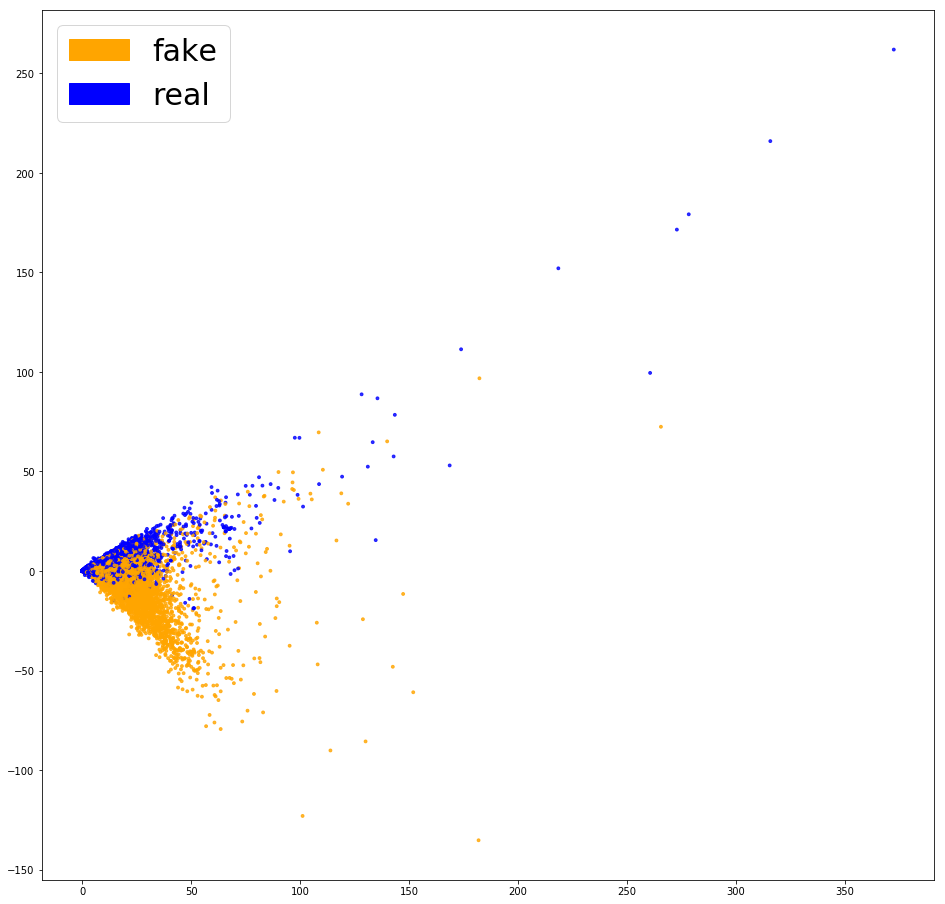

In [31]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='fake')
            green_patch = mpatches.Patch(color='blue', label='real')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

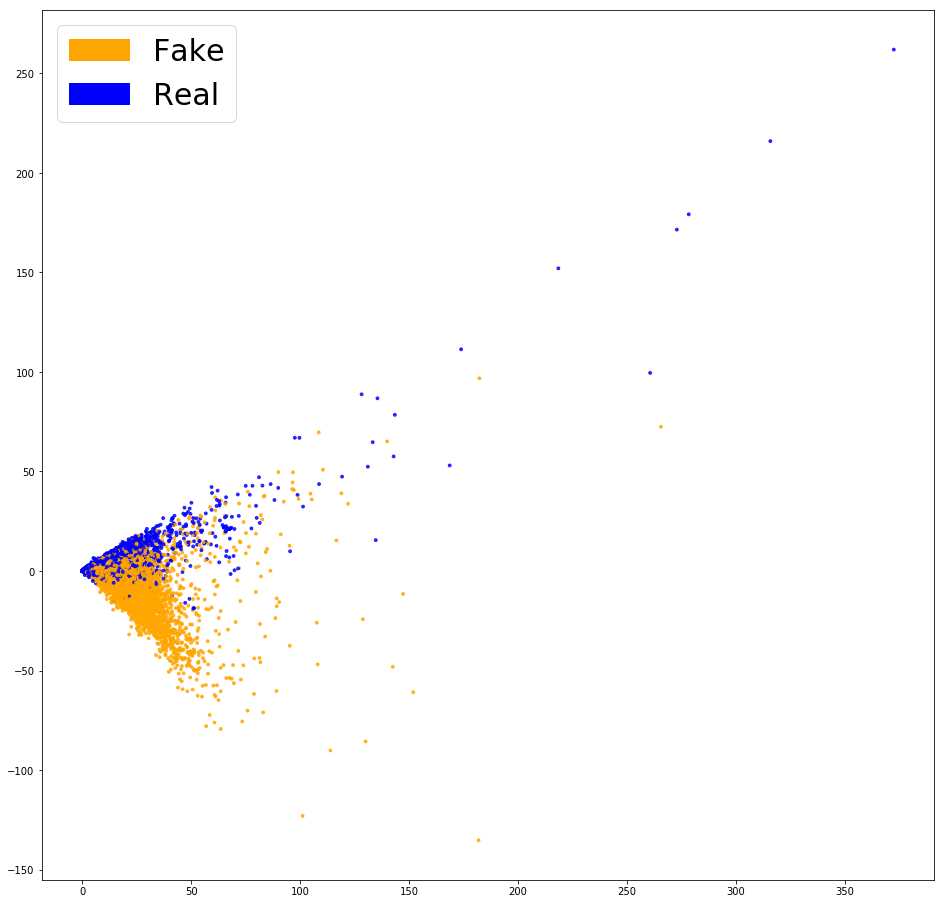

In [33]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Fake')
            green_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.946, precision = 0.946, recall = 0.946, f1 = 0.946
